In [3]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 8.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv.imread("/Users/divyeshmedidi/Downloads/2.jpg")

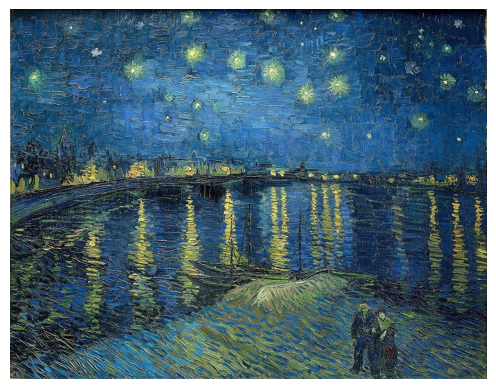

In [85]:
cv.imshow('image', img)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
baw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('image', baw)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# Read and Display an Image: Loading an image into memory is the first step in
# processing. The image can be displayed to verify correctness and understand its structure.
# Observe Image Properties: Key properties such as image dimensions, number of
# channels, and datatype of pixel values
# Split the Layers: Color images have multiple channels (e.g., Red, Green, Blue). These
# channels can be separated for individual analysis or processing.
# Convert to Grayscale: Grayscale conversion reduces a color image to a single channel,
# simplifying processing tasks and reducing computational overhead.
# Crop an Image: Cropping extracts a region of interest (ROI) from an image by slicing its
# array representation.
# Arithmetic Operations: Operations like addition, subtraction, and multiplication can be
# applied to images for enhancement or combining effects. Example: Image blending using
# weighted addition:
# Logical Operations: Logical operations like AND, OR, XOR, and NOT can be applied to
# images for masking or combining binary images.

In [5]:
# Observe Image Properties: Key properties such as image dimensions, number of
# channels, and datatype of pixel values
print("Image Shape:", img.shape)
print("Number of Channels:", img.shape[2] if len(img.shape) > 2 else 1)
print("Datatype:", img.dtype)

Image Shape: (1163, 1500, 3)
Number of Channels: 3
Datatype: uint8


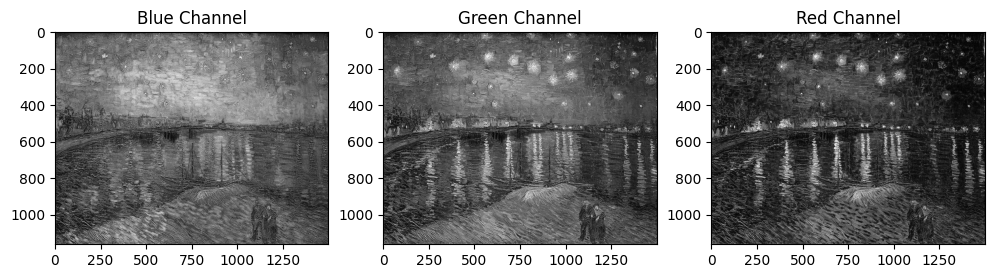

In [86]:
# Split the Layers: Color images have multiple channels (e.g., Red, Green, Blue). These
# # channels can be separated for individual analysis or processing.
b, g, r = cv.split(img)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Blue Channel')
plt.imshow(b, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Green Channel')
plt.imshow(g, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Red Channel')
plt.imshow(r, cmap='gray')
plt.show()

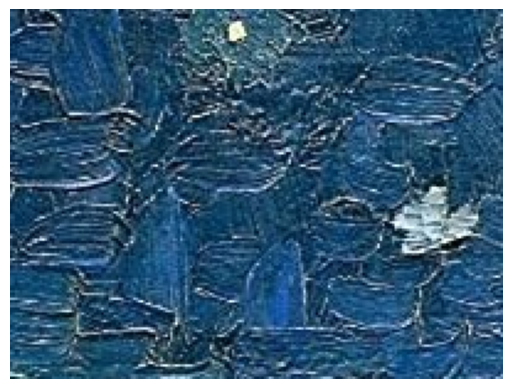

In [87]:
# simplifying processing tasks and reducing computational overhead.
# Crop an Image: Cropping extracts a region of interest (ROI) from an image by slicing its
# array representation.
cropped_img = img[50:200, 100:300]  # Example coordinates
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()  

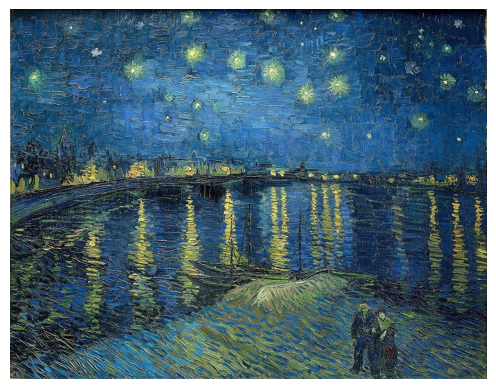

In [88]:
# Arithmetic Operations: Operations like addition, subtraction, and multiplication can be
# applied to images for enhancement or combining effects. Example: Image blending using
# weighted addition:
# Logical Operations: Logical operations like AND, OR, XOR, and NOT can be applied to
# images for masking or combining binary images.
alpha = 0.7
beta = 0.3
blended_img = cv.addWeighted(img, alpha, img, beta, 0)
plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

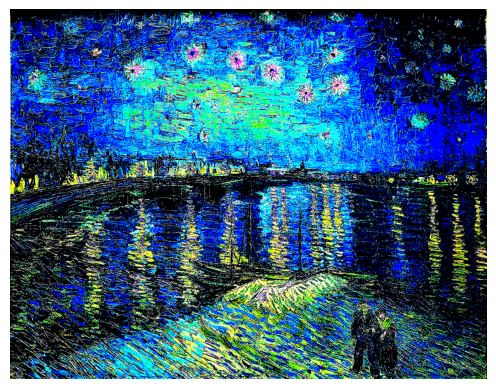

In [89]:
# perform grey level slicing on the image
def grey_level_slicing(image, lower_bound, upper_bound, highlight_value=255):
    # Create a copy of the image to avoid modifying the original
    sliced_image = np.zeros_like(image)
    
    # Apply grey level slicing
    mask = (image >= lower_bound) & (image <= upper_bound)
    sliced_image[mask] = highlight_value
    
    return sliced_image
# Define the grey level bounds
img1 =grey_level_slicing(img, 100, 200)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()  

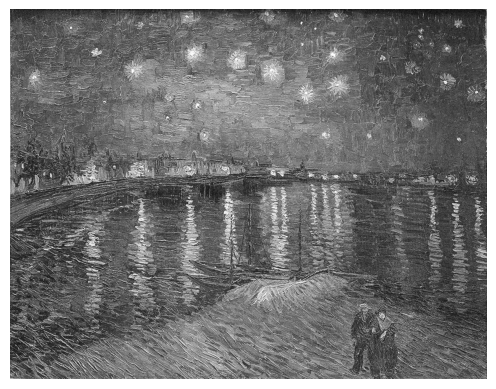

In [90]:
noise = np.random.randint(0,50,(baw.shape),dtype='uint8')
noisy_img = cv.add(baw,noise)
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.show()

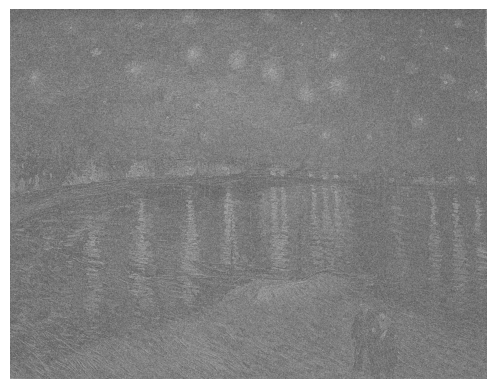

In [91]:
mean=50
std=100
noise=np.random.normal(mean,std,baw.shape)
noisy=baw+noise
plt.imshow(noisy, cmap='gray')
plt.axis('off')
plt.show()

In [97]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
new_image = gray.copy()
w = 1/9
c, r = new_image.shape

/var/folders/p1/yw1zg1xj0jz7g2tq3wtk6yh80000gn/T/ipykernel_35684/277706890.py:4: RuntimeWarning: overflow encountered in scalar add
  new_image[i, j] = int(w * (new_image[i-1, j-1] + new_image[i-1, j] + new_image[i-1, j+1] +


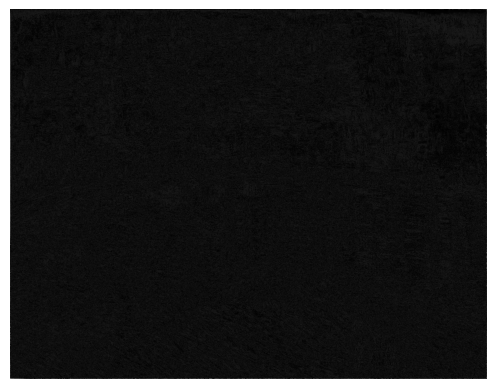

In [98]:
for i in range(1, c-1):
    for j in range(1, r-1):
        # Apply the averaging filter
        new_image[i, j] = int(w * (new_image[i-1, j-1] + new_image[i-1, j] + new_image[i-1, j+1] +
                                   new_image[i, j-1] + new_image[i, j] + new_image[i, j+1] +
                                   new_image[i+1, j-1] + new_image[i+1, j] + new_image[i+1, j+1]))
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.show()

In [56]:
cv.imshow('gray', gray)
cv.waitKey(0)
cv.destroyAllWindows()

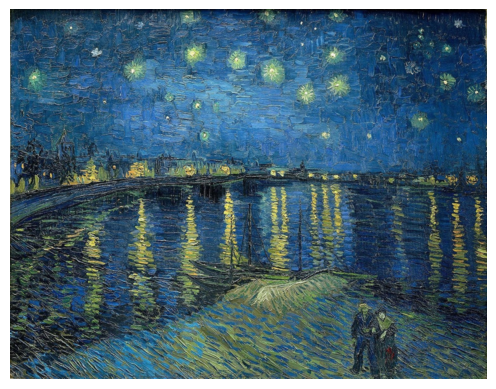

In [95]:
mean_filter = np.ones((3, 3), dtype=np.float32) / 9.0
filtered_image = cv.filter2D(img, -1, mean_filter)
plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [41]:
import random

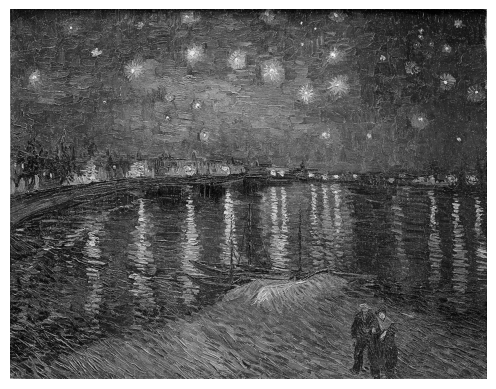

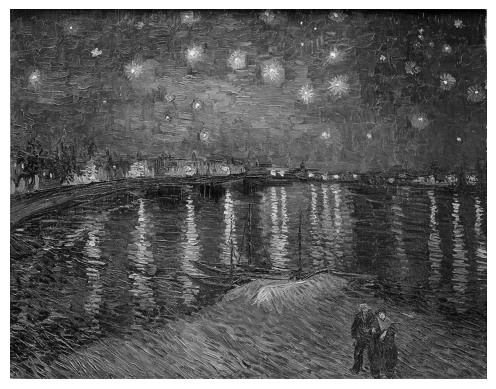

In [99]:
salt_vs_pepper=1
pro=0.05
import random
import numpy as np

salty = gray.copy()
peppery = gray.copy()
rows, cols = salty.shape[:2]
pro = 0.02

num_salt = int(rows * cols * pro / 2)
num_pepper = int(rows * cols * pro / 2)

# Salt
for _ in range(num_salt):
    y = random.randint(0, rows - 1)
    x = random.randint(0, cols - 1)
    salty[y, x] = 255

# Pepper
for _ in range(num_pepper):
    y = random.randint(0, rows - 1)
    x = random.randint(0, cols - 1)
    salty[y, x] = 0
plt.imshow(salty, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(peppery, cmap='gray')
plt.axis('off')
plt.show()

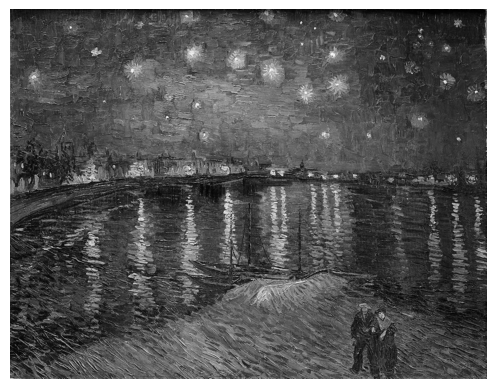

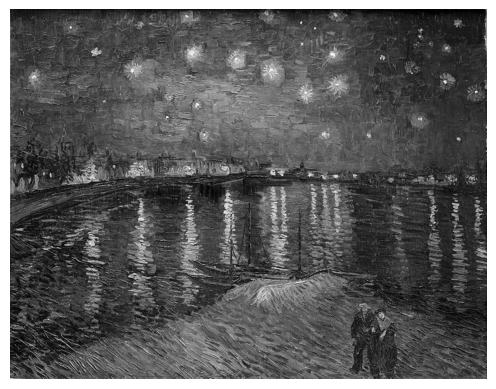

In [101]:
not_salty=salty.copy()
not_peppery=peppery.copy()

l=[]

for i in range(1,rows-2):
  for j in range(1,cols-2):
    l.append(gray[i,j])
    l.append(gray[i,j+1])
    l.append(gray[i,j+2])
    l.append(gray[i+1,j])
    l.append(gray[i+1,j+1])
    l.append(gray[i+1,j+2])
    l.append(gray[i+2,j])
    l.append(gray[i+2,j+1])
    l.append(gray[i+2,j+2])
    l.sort()
    n=len(l)
    if n%2==0:
      res=(l[int(n/2)]+l[int(n/2)-1])/2
    else:
      res=l[int(n/2)]
    not_salty[i,j]=res
    not_peppery[i,j]=res
    l=[]
plt.imshow(not_salty, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(not_peppery, cmap='gray')
plt.axis('off')
plt.show()


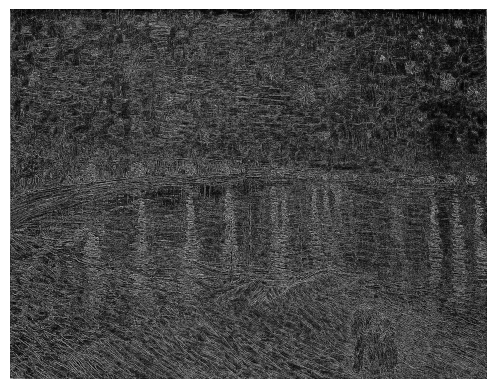

In [102]:
hpf_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

filtered_image = cv.filter2D(gray, -1, hpf_kernel)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

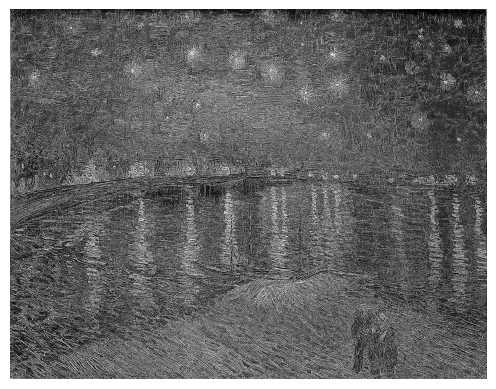

In [103]:
hbf_kernal = np.array([[-1, -1, -1],
                        [-1, 8.9, -1],
                        [-1, -1, -1]])
filtered_image1 = cv.filter2D(gray, -1, hbf_kernal)
plt.imshow(filtered_image1, cmap='gray')
plt.axis('off')
plt.show()


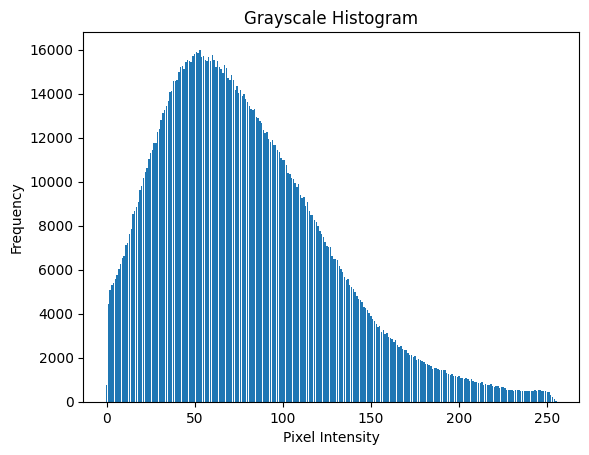

In [67]:
hist = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.bar(range(256), hist.ravel())
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [68]:
r_min=np.min(gray)
r_max=np.max(gray)
s_min=0
s_max=255
stretched = np.zeros_like(gray, dtype=np.uint8)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        stretched[i, j] = ((gray[i, j] - r_min) / (r_max - r_min)) * (s_max - s_min) + s_min

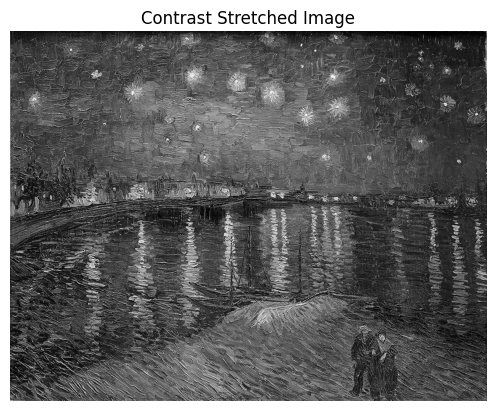

In [71]:
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()

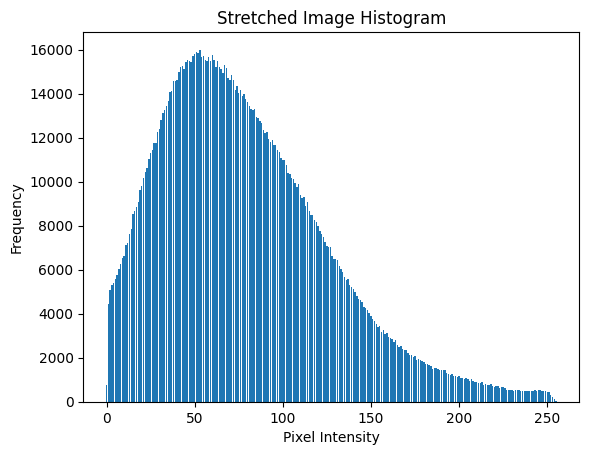

In [72]:
st = cv.calcHist([stretched], [0], None, [256], [0, 256])
plt.bar(range(256), st.ravel())
plt.title('Stretched Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

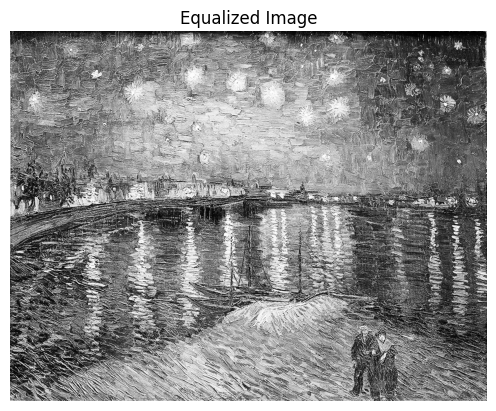

In [104]:
equalised = cv.equalizeHist(gray)
plt.imshow(equalised, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

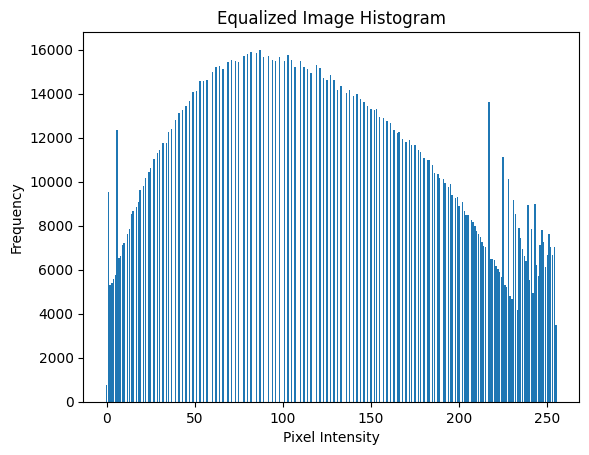

In [74]:
eq = cv.calcHist([equalised], [0], None, [256], [0, 256])
plt.bar(range(256), eq.ravel())
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [107]:
gray2 = cv.imread("/Users/divyeshmedidi/Downloads/12.jpg", cv.IMREAD_GRAYSCALE)
cv.imshow('gray2', gray2)
cv.waitKey(0)
cv.destroyAllWindows()

In [76]:
stretched = cv.equalizeHist(gray)
cv.imshow('Histogram Stretched Image', stretched)
cv.waitKey(0)
cv.destroyAllWindows()

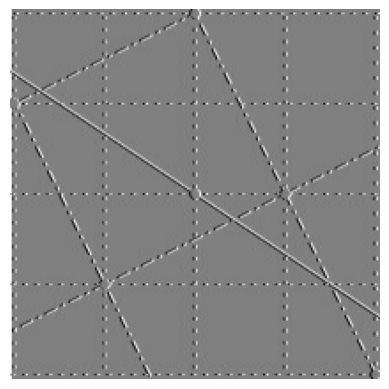

In [108]:
gray2_float = gray2.astype(np.float32) / 255.0
horizontal_gradient = gray2_float.copy()
for i in range(gray2.shape[0]):
    for j in range(1, gray2.shape[1]):
        horizontal_gradient[i, j] = gray2_float[i, j] - gray2_float[i, j - 1]
plt.imshow(horizontal_gradient, cmap='gray')
plt.axis('off')
plt.show()

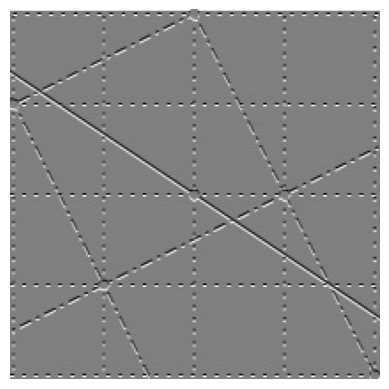

In [109]:
vertical_gradient = gray2_float.copy()
for i in range(1, gray2.shape[0]):
    for j in range(gray2.shape[1]):
        vertical_gradient[i, j] = gray2_float[i, j] - gray2_float[i - 1, j]
plt.imshow(vertical_gradient, cmap='gray')
plt.axis('off')
plt.show()

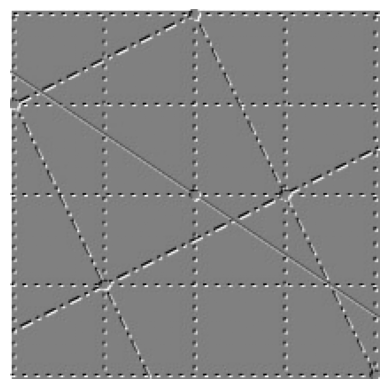

In [110]:
diagonal_gradient = gray2_float.copy()
for i in range(1, gray2.shape[0]):
    for j in range(1, gray2.shape[1]):
        diagonal_gradient[i, j] = gray2_float[i, j] - gray2_float[i - 1, j - 1]
plt.imshow(diagonal_gradient, cmap='gray')
plt.axis('off')
plt.show()

In [111]:
# Apply ideal, gaussian, and butterworth low pass and high pass filters in the frequency domain
def distance_matrix(gray2):
    distance_matrix = np.zeros(gray2.shape, dtype=np.float32)
    rows, cols = gray2.shape
    crow, ccol = rows // 2, cols // 2
    for u in range(rows):
        for v in range(cols):
            distance_matrix[u, v] = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
    return distance_matrix

def ideal_low_pass_filter(gray2, cutoff):
    d_matrix = distance_matrix(gray2)
    rows, cols = gray2.shape
    filter_mask = np.zeros((rows, cols), dtype=np.float32)
    filter_mask[d_matrix <= cutoff] = 1
    return filter_mask

def gaussian_low_pass_filter(gray2, cutoff):
    d_matrix = distance_matrix(gray2)
    filter_mask = np.exp(-(d_matrix ** 2) / (2 * (cutoff ** 2)))
    return filter_mask

def butterworth_low_pass_filter(gray2, cutoff, order=2):
    d_matrix = distance_matrix(gray2)
    filter_mask = 1 / (1 + (d_matrix / cutoff) ** (2 * order))
    return filter_mask

def ideal_high_pass_filter(gray2, cutoff):
    d_matrix = distance_matrix(gray2)
    rows, cols = gray2.shape
    filter_mask = np.ones((rows, cols), dtype=np.float32)
    filter_mask[d_matrix <= cutoff] = 0
    return filter_mask

def gaussian_high_pass_filter(gray2, cutoff):
    d_matrix = distance_matrix(gray2)
    filter_mask = 1 - np.exp(-(d_matrix ** 2) / (2 * (cutoff ** 2)))
    return filter_mask

def butterworth_high_pass_filter(gray2, cutoff, order=2):
    d_matrix = distance_matrix(gray2)
    filter_mask = 1 / (1 + (cutoff / d_matrix) ** (2 * order))
    return filter_mask

In [112]:
def apply_filter_in_frequency_domain(gray2, filter_mask):
    dft = np.fft.fft2(gray2)
    dft_shifted = np.fft.fftshift(dft)
    filtered_dft = dft_shifted * filter_mask
    filtered_dft_shifted_back = np.fft.fftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shifted_back)
    filtered_image = np.abs(filtered_image)
    return filtered_image

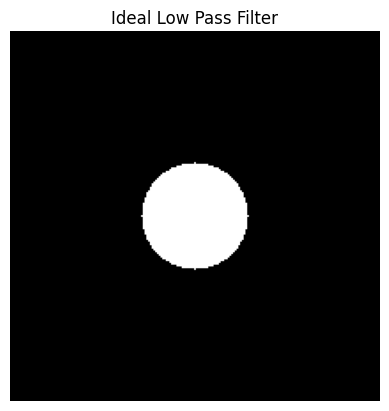

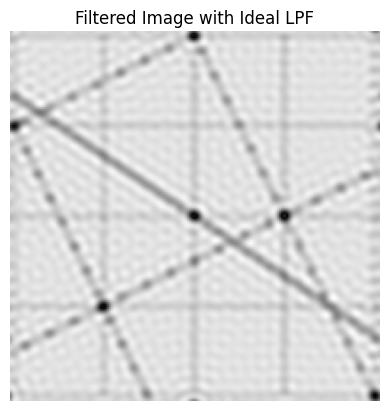

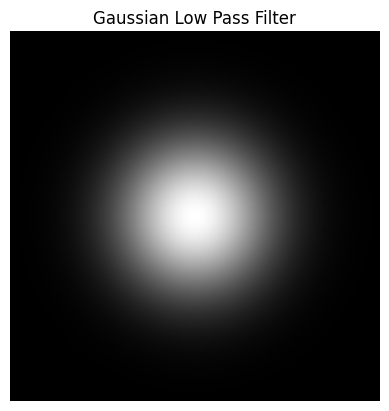

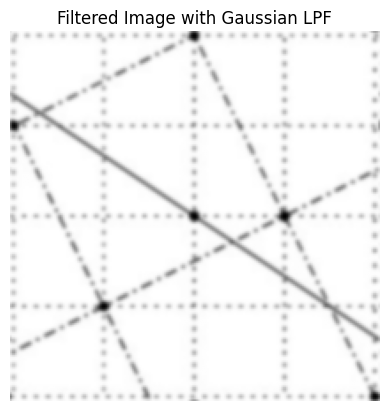

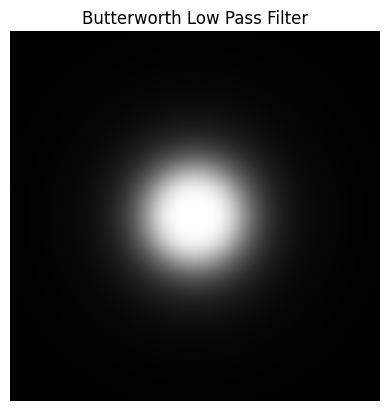

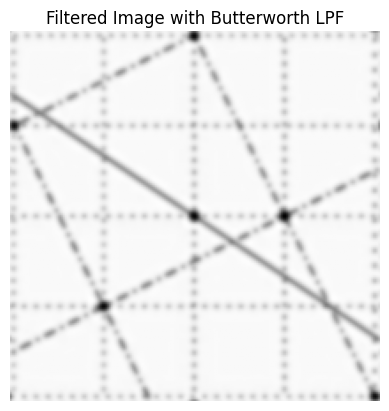

In [113]:
H_ideal_LPF = ideal_low_pass_filter(gray2, cutoff=30)
H_gaussian_LPF = gaussian_low_pass_filter(gray2, cutoff=30)
H_butterworth_LPF = butterworth_low_pass_filter(gray2, cutoff=30, order=2)

plt.imshow(H_ideal_LPF, cmap='gray')
plt.title('Ideal Low Pass Filter')
plt.axis('off')
plt.show()
filtered_ideal_LPF = apply_filter_in_frequency_domain(gray2, H_ideal_LPF)
plt.imshow(filtered_ideal_LPF, cmap='gray')
plt.title('Filtered Image with Ideal LPF')
plt.axis('off')
plt.show()
plt.imshow(H_gaussian_LPF, cmap='gray')
plt.title('Gaussian Low Pass Filter')
plt.axis('off')
plt.show()
filtered_gaussian_LPF = apply_filter_in_frequency_domain(gray2, H_gaussian_LPF)
plt.imshow(filtered_gaussian_LPF, cmap='gray')
plt.title('Filtered Image with Gaussian LPF')
plt.axis('off')
plt.show()
plt.imshow(H_butterworth_LPF, cmap='gray')
plt.title('Butterworth Low Pass Filter')
plt.axis('off')
plt.show()
filtered_butterworth_LPF = apply_filter_in_frequency_domain(gray2, H_butterworth_LPF)
plt.imshow(filtered_butterworth_LPF, cmap='gray')
plt.title('Filtered Image with Butterworth LPF')
plt.axis('off')
plt.show()

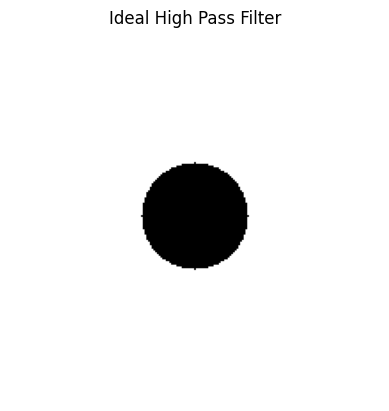

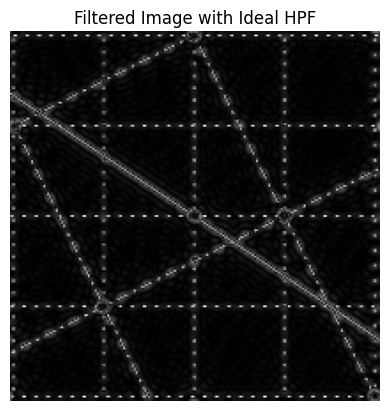

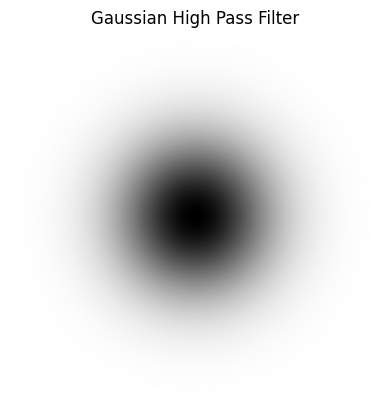

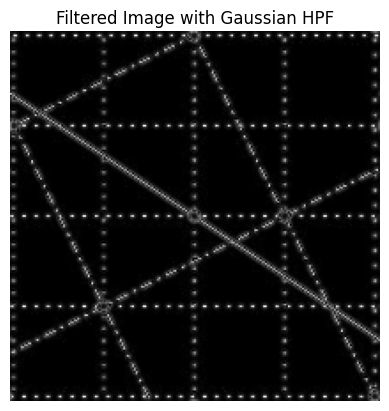

/var/folders/p1/yw1zg1xj0jz7g2tq3wtk6yh80000gn/T/ipykernel_35684/1251274476.py:42: RuntimeWarning: divide by zero encountered in divide
  filter_mask = 1 / (1 + (cutoff / d_matrix) ** (2 * order))


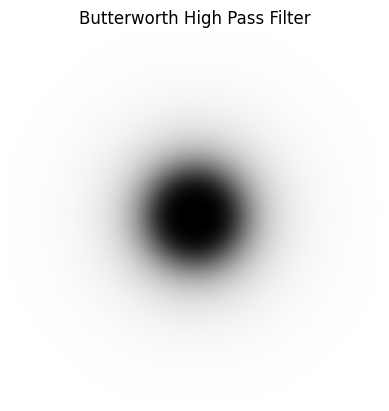

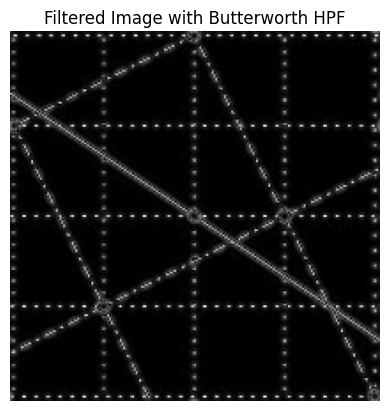

In [114]:
ideal_high_pass_filter = ideal_high_pass_filter(gray2, cutoff=30)
plt.imshow(ideal_high_pass_filter, cmap='gray')
plt.title('Ideal High Pass Filter')
plt.axis('off')
plt.show()
filtered_ideal_HPF = apply_filter_in_frequency_domain(gray2, ideal_high_pass_filter)
plt.imshow(filtered_ideal_HPF, cmap='gray')
plt.title('Filtered Image with Ideal HPF')
plt.axis('off')
plt.show()
gaussian_high_pass_filter = gaussian_high_pass_filter(gray2, cutoff=30)
plt.imshow(gaussian_high_pass_filter, cmap='gray')
plt.title('Gaussian High Pass Filter')
plt.axis('off')
plt.show()
filtered_gaussian_HPF = apply_filter_in_frequency_domain(gray2, gaussian_high_pass_filter)
plt.imshow(filtered_gaussian_HPF, cmap='gray')
plt.title('Filtered Image with Gaussian HPF')
plt.axis('off')
plt.show()
butterworth_high_pass_filter = butterworth_high_pass_filter(gray2, cutoff=30, order=2)
plt.imshow(butterworth_high_pass_filter, cmap='gray')
plt.title('Butterworth High Pass Filter')
plt.axis('off')
plt.show()
filtered_butterworth_HPF = apply_filter_in_frequency_domain(gray2, butterworth_high_pass_filter)
plt.imshow(filtered_butterworth_HPF, cmap='gray')
plt.title('Filtered Image with Butterworth HPF')
plt.axis('off')
plt.show()

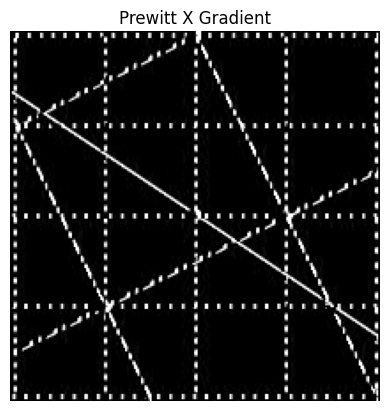

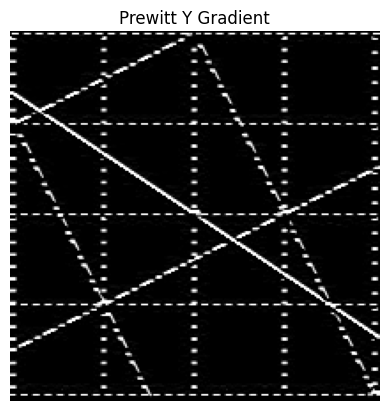

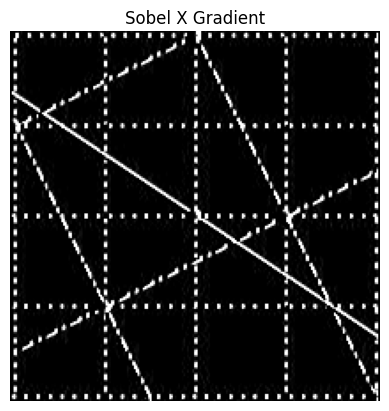

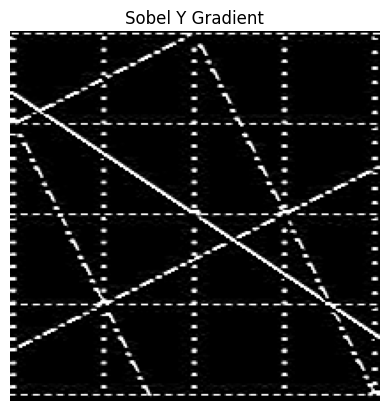

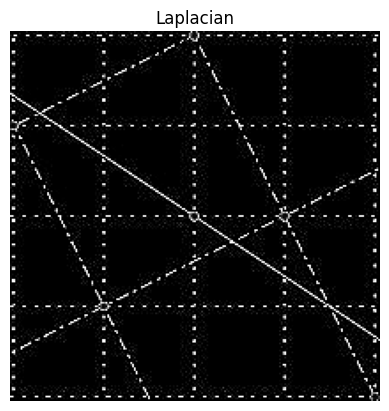

In [115]:
# prewitt_x , prewitt_y, Sobel_x, Sobel_y, Laplacian
prewitt_x = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]])
prewitt_y = np.array([[ 1, 1, 1],
                      [ 0, 0, 0],
                      [ -1, -1, -1]])
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])
sobel_y = np.array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [ -1, -2, -1]])
laplacian = np.array([[ 0, 1, 0],
                      [ 1, -4, 1],
                      [ 0, 1, 0]])

prewitt_x_image = cv.filter2D(gray2, -1, prewitt_x)
plt.imshow(prewitt_x_image, cmap='gray')
plt.title('Prewitt X Gradient')
plt.axis('off')
plt.show()
prewitt_y_image = cv.filter2D(gray2, -1, prewitt_y)
plt.imshow(prewitt_y_image, cmap='gray')
plt.title('Prewitt Y Gradient')
plt.axis('off')
plt.show()
sobel_x_image = cv.filter2D(gray2, -1, sobel_x)
plt.imshow(sobel_x_image, cmap='gray')
plt.title('Sobel X Gradient')
plt.axis('off')
plt.show()
sobel_y_image = cv.filter2D(gray2, -1, sobel_y)
plt.imshow(sobel_y_image, cmap='gray')
plt.title('Sobel Y Gradient')
plt.axis('off')
plt.show()
laplacian_image = cv.filter2D(gray2, -1, laplacian)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian')
plt.axis('off')
plt.show()

In [118]:
import math

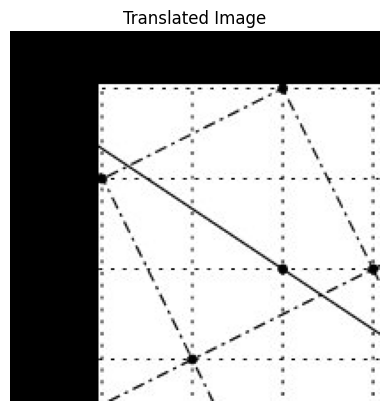

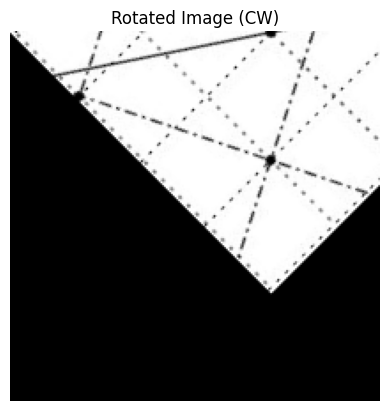

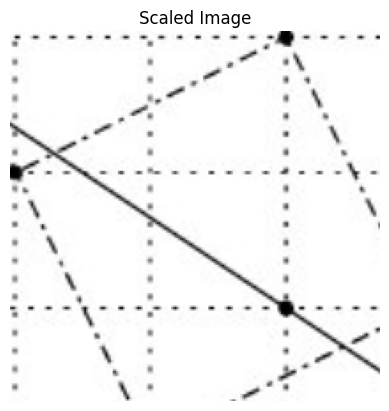

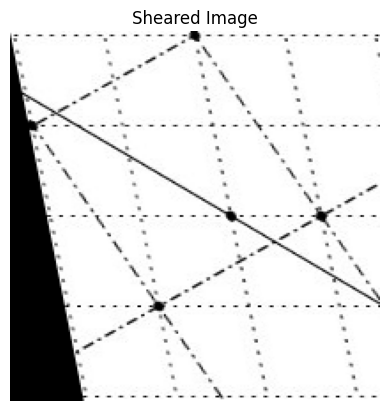

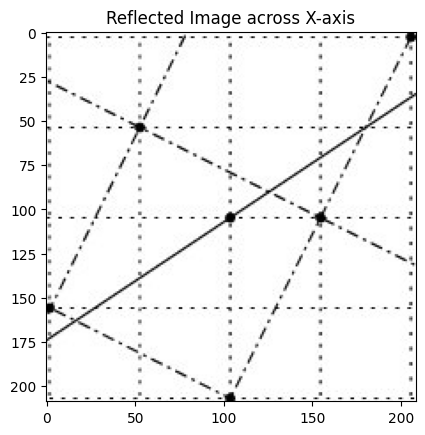

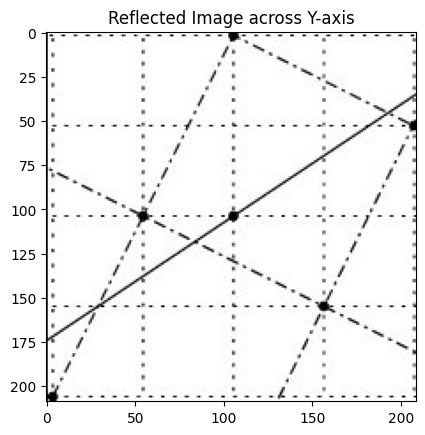

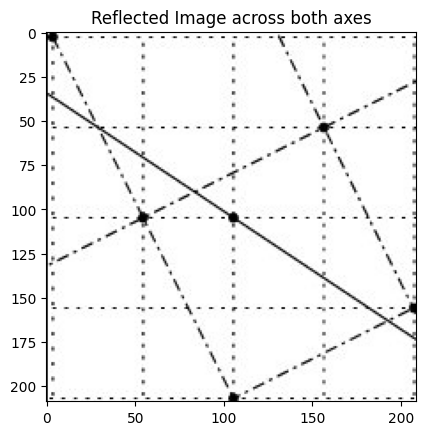

In [122]:
def translate(img, x, y):
    rows, cols = img.shape
    Matrix = np.float32([[1,0,x],[0,1,y]])
    translated_img = cv.warpAffine(img, Matrix, (cols, rows))
    return translated_img

def rotate(img, angle, rotation):
    rows, cols = img.shape
    if rotation == 'CW':
        Matrix = np.float32([[math.cos(math.radians(-angle)), -math.sin(math.radians(-angle)), 0],
                              [math.sin(math.radians(-angle)), math.cos(math.radians(-angle)), 0]])
    else:
        Matrix = np.float32([[math.cos(math.radians(angle)), -math.sin(math.radians(angle)), 0],
                              [math.sin(math.radians(angle)), math.cos(math.radians(angle)), 0]])
    rotated_img = cv.warpAffine(img, Matrix, (cols, rows))
    return rotated_img

def scale(img, sx, sy):
    rows, cols = img.shape
    Matrix = np.float32([[sx,0,0],[0,sy,0]])
    scaled_img = cv.warpAffine(img, Matrix, (cols, rows))
    return scaled_img

def shear(img, shx, shy):
    rows, cols = img.shape
    Matrix = np.float32([[1,shx,0],[shy,1,0]])
    sheared_img = cv.warpAffine(img, Matrix, (cols, rows))
    return sheared_img

def reflect_x(img,x, y):
    rows, cols = img.shape
    Matrix = np.float32([[x,0,0],[0,y,rows]])
    reflected_img = cv.warpAffine(img, Matrix, (cols, rows))
    return reflected_img

def reflect_y(img,x, y):
    rows, cols = img.shape
    Matrix = np.float32([[x,0,cols],[0,y,0]])
    reflected_img = cv.warpAffine(img, Matrix, (cols, rows))
    return reflected_img

def reflect_xy(img,x,y):
    rows, cols = img.shape
    Matrix = np.float32([[x,0,cols],[0,y,rows]])
    reflected_img = cv.warpAffine(img, Matrix, (cols, rows))
    return reflected_img

plt.imshow(translate(gray2, 50, 30), cmap='gray')
plt.title('Translated Image')
plt.axis('off')
plt.show()
plt.imshow(rotate(gray2, 45, 'CW'), cmap='gray')
plt.title('Rotated Image (CW)')
plt.axis('off')
plt.show()
plt.imshow(scale(gray2, 1.5, 1.5), cmap='gray')
plt.title('Scaled Image')
plt.axis('off')
plt.show()
plt.imshow(shear(gray2, 0.2, 0), cmap='gray')
plt.title('Sheared Image')
plt.axis('off')
plt.show()
plt.imshow(reflect_x(gray2, 1, -1), cmap='gray')
plt.title('Reflected Image across X-axis')
plt.show()
plt.imshow(reflect_y(gray2, -1, 1), cmap='gray')
plt.title('Reflected Image across Y-axis')
plt.show() 
plt.imshow(reflect_xy(gray2, -1, -1), cmap='gray')
plt.title('Reflected Image across both axes')
plt.show()
    

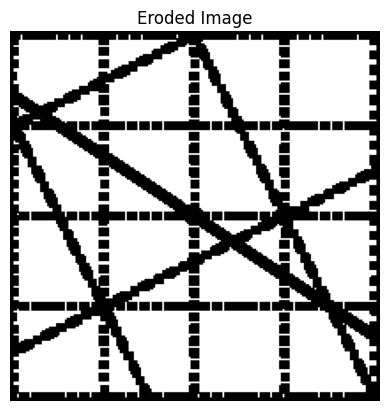

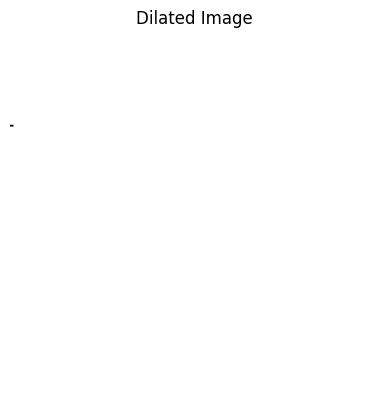

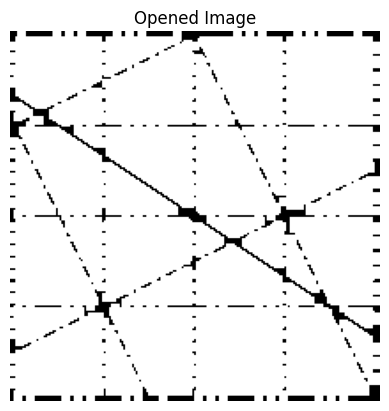

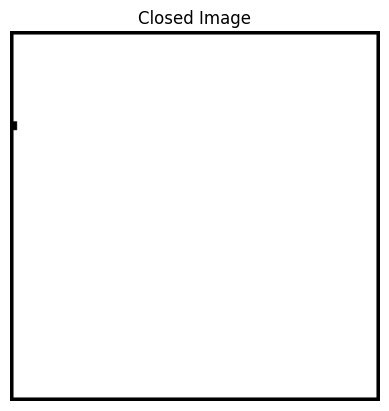

In [123]:
# perform erosion , dialation, opening, closing on a binary image
kernel = np.ones((5,5),np.uint8)
def erosion(image, kernel):
    mask = np.zeros_like(image)
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = cv.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv.BORDER_CONSTANT, value=0)
    for i in range(img_rows):
        for j in range(img_cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            if np.array_equal(region & kernel, kernel):
                mask[i, j] = 1
    return mask
def dilation(image, kernel):
    mask = np.zeros_like(image)
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = cv.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv.BORDER_CONSTANT, value=0)
    for i in range(img_rows):
        for j in range(img_cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            if np.any(region & kernel):
                mask[i, j] = 1
    return mask
def opening(image, kernel):
    eroded = erosion(image, kernel)
    opened = dilation(eroded, kernel)
    return opened
def closing(image, kernel):
    dilated = dilation(image, kernel)
    closed = erosion(dilated, kernel)
    return closed
binary_image = cv.threshold(gray2, 127, 1, cv.THRESH_BINARY)[1]
eroded_image = erosion(binary_image, kernel)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()
dilated_image = dilation(binary_image, kernel)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()
opened_image = opening(binary_image, kernel)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()
closed_image = closing(binary_image, kernel)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.show()

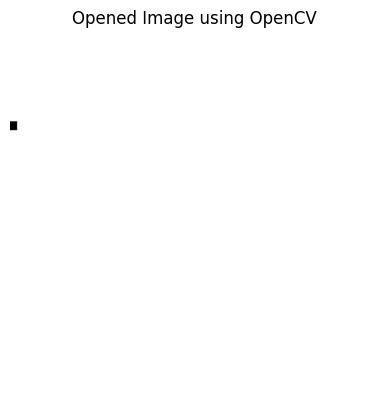

In [127]:
dia = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(dia, cmap='gray')
plt.title('Opened Image using OpenCV')
plt.axis('off')
plt.show()

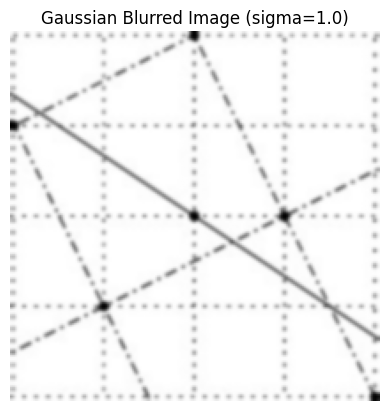

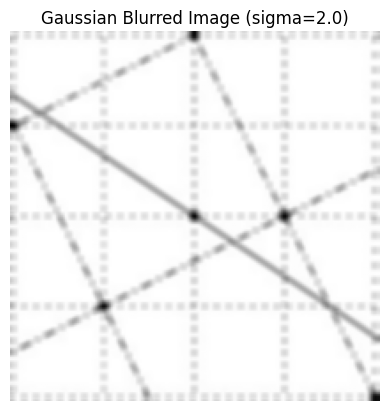

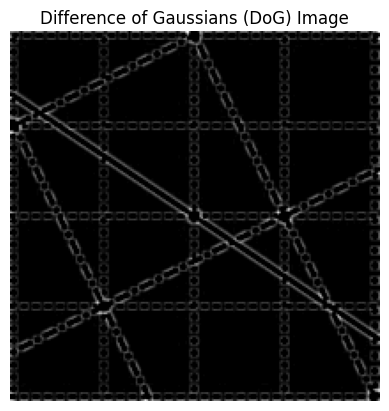

In [129]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

gray2 = cv.imread("/Users/divyeshmedidi/Downloads/12.jpg", cv.IMREAD_GRAYSCALE)

sigma = 1.0
sigma2 = 2.0
size = 5
gaussian_kern1 = gaussian_kernel(size, sigma)
gaussian_kern2 = gaussian_kernel(size, sigma2)
blurred_image1 = cv.filter2D(gray2, -1, gaussian_kern1)
plt.imshow(blurred_image1, cmap='gray')
plt.title('Gaussian Blurred Image (sigma=1.0)')
plt.axis('off')
plt.show()
blurred_image2 = cv.filter2D(gray2, -1, gaussian_kern2)
plt.imshow(blurred_image2, cmap='gray')
plt.title('Gaussian Blurred Image (sigma=2.0)')
plt.axis('off')
plt.show()
DOG_kern = gaussian_kern1 - gaussian_kern2
dog_image = cv.filter2D(gray2, -1, DOG_kern)
plt.imshow(dog_image, cmap='gray')
plt.title('Difference of Gaussians (DoG) Image')
plt.axis('off')
plt.show()

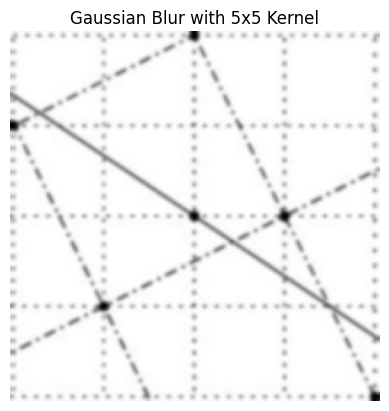

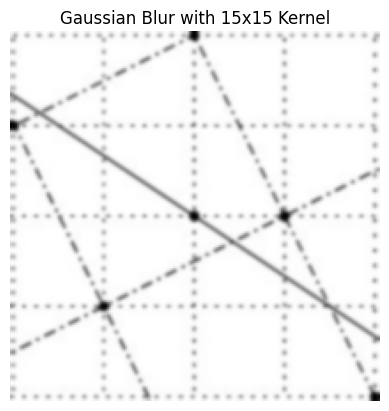

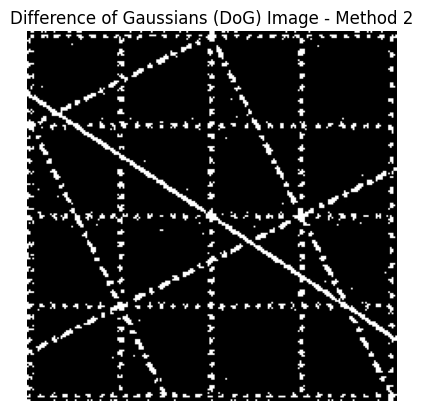

In [132]:
gaussian1 = gaussian_kernel(5, 1.0)
gaussian2 = gaussian_kernel(15, 1.0)
method2_1 = cv.filter2D(gray2, -1, gaussian1)
plt.imshow(method2_1, cmap='gray')
plt.title('Gaussian Blur with 5x5 Kernel')
plt.axis('off')
plt.show()
method2_2 = cv.filter2D(gray2, -1, gaussian2)
plt.imshow(method2_2, cmap='gray')
plt.title('Gaussian Blur with 15x15 Kernel')
plt.axis('off')
plt.show()
dog2 = method2_1 - method2_2
plt.imshow(dog2, cmap='gray')
plt.title('Difference of Gaussians (DoG) Image - Method 2')
plt.axis('off')
plt.show()

In [133]:
def convolution2d(image, kernel):
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    convolved_image = np.zeros_like(image)
    for i in range(img_rows):
        for j in range(img_cols):
            convolved_value = np.sum(image * kernel)
            convolved_image[i, j] = convolved_value
    return convolved_image

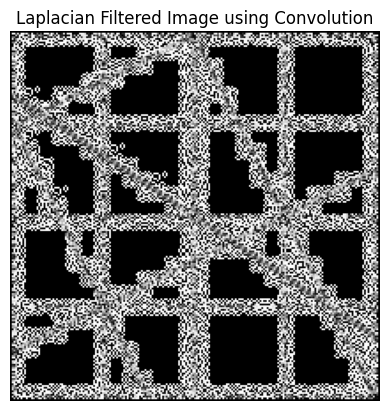

In [140]:
lap_mask = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
lap_out = np.zeros_like(gray2, dtype=np.float32)

for i in range(1, gray2.shape[0] - 1):
    for j in range(1, gray2.shape[1] - 1):
        val = (gray2[i-1, j-1]*lap_mask[0,0] + gray2[i-1, j]*lap_mask[0,1] + gray2[i-1, j+1]*lap_mask[0,2] +
               gray2[i, j-1]*lap_mask[1,0]   + gray2[i, j]*lap_mask[1,1]   + gray2[i, j+1]*lap_mask[1,2] +
               gray2[i+1, j-1]*lap_mask[2,0] + gray2[i+1, j]*lap_mask[2,1] + gray2[i+1, j+1]*lap_mask[2,2])
        lap_out[i, j] = val

plt.imshow(lap_out.astype(np.uint8), cmap='gray')
plt.title('Laplacian Filtered Image using Convolution')
plt.axis('off')
plt.show()

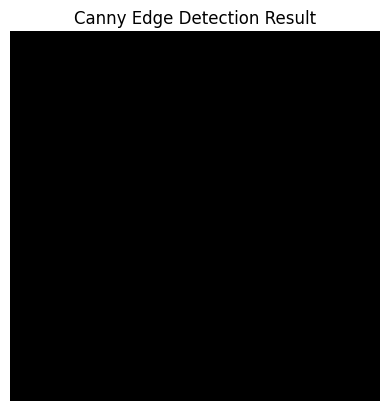

In [144]:
# 1. 2. 3. 4. Edge Detection using the Laplacian of Gaussian (LoG) method.
# Edge Detection using the Canny algorithm.
# Compare and analyse the results of each method.
# Implement Canny Edge detection stepwise
# ➢ Apply Gaussian Blur
# ➢ Find Gradients(Sobel)
# ➢ Non-Maximum Suppression: (Round the gradient direction to the nearest 45
# degrees. For each pixel, check if it is the maximum in the gradient direction. If
# not, set it to zero.)
# ➢ Double Thresholding: To classify edges into strong, weak, and non-edges.
# (Strong edges are those with gradient magnitudes above the high threshold.
# Weak edges are those with gradient magnitudes between the low and high
# thresholds. Non-edges are those below the low threshold.) Mark strong edges
# and weak edges and keep them for the final step. Define lower and upper
# thresholds, apply double thresholding, Set strong edges to 255 (white), weak
# edges to lower threshold (gray)
# ➢ Edge Tracking by Hysteresis: To track weak edges that are connected to
# strong edges, and remove isolated weak edges
def gaussian_blur(image, kernel_size=5, sigma=1.0):
    gaussian_kern = gaussian_kernel(kernel_size, sigma)
    blurred_image = cv.filter2D(image, -1, gaussian_kern)
    return blurred_image
def sobel_gradients(image):
    sobel_x = np.array([[ -1, 0, 1],
                        [ -2, 0, 2],
                        [ -1, 0, 1]])
    sobel_y = np.array([[ 1, 2, 1],
                        [ 0, 0, 0],
                        [ -1, -2, -1]])
    gradient_x = cv.filter2D(image, -1, sobel_x)
    gradient_y = cv.filter2D(image, -1, sobel_y)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x) * (180.0 / np.pi)
    direction[direction < 0] += 180
    return magnitude, direction
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.float32)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            angle = direction[i, j]
            q = 255
            r = 255
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif (22.5 <= angle < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif (67.5 <= angle < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif (112.5 <= angle < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0
    return suppressed
def double_thresholding(image, low_threshold, high_threshold):
    strong = 200
    weak = 100
    result = np.zeros_like(image, dtype=np.uint8)
    strong_i, strong_j = np.where(image >= high_threshold)
    zeros_i, zeros_j = np.where(image < low_threshold)
    weak_i, weak_j = np.where((image <= high_threshold) & (image >= low_threshold))
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak
    return result
def edge_tracking_by_hysteresis(image):
    rows, cols = image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if image[i, j] == 75:
                if ((image[i+1, j-1] == 255) or (image[i+1, j] == 255) or (image[i+1, j+1] == 255)
                    or (image[i, j-1] == 255) or (image[i, j+1] == 255)
                    or (image[i-1, j-1] == 255) or (image[i-1, j] == 255) or (image[i-1, j+1] == 255)):
                    image[i, j] = 255
                else:
                    image[i, j] = 0
    return image
blurred_image = gaussian_blur(gray2, kernel_size=5, sigma=1.4)
magnitude, direction = sobel_gradients(blurred_image)
suppressed_image = non_maximum_suppression(magnitude, direction)
double_thresholded_image = double_thresholding(suppressed_image, low_threshold=20, high_threshold=40)
canny_edges = edge_tracking_by_hysteresis(double_thresholded_image)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection Result')
plt.axis('off')
plt.show()

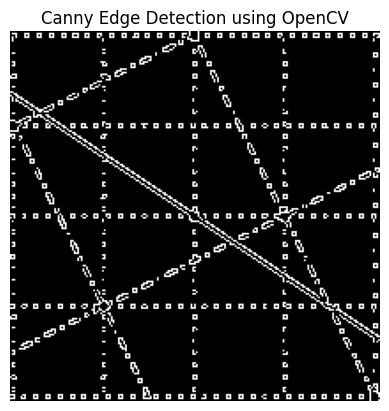

In [143]:
can = cv.Canny(gray2, 100, 200)
plt.imshow(can, cmap='gray')
plt.title('Canny Edge Detection using OpenCV')
plt.axis('off')
plt.show()